###最终可运行版本

##1.生成粗略质量特征

In [20]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAI
from langchain_openai import ChatOpenAI

In [21]:
OPENAI_API_KEY='sk-qrl2JUfbODx71WS3GKGP6qoZAa1KkSynlMTY0e5ZDiPcd7IR'
OPENAI_API_BASE='https://api.gpts.vin/v1'  #https://api.chatanywhere.com.cn/v1
llm = ChatOpenAI(model_name="gpt-3.5-turbo-0125",openai_api_key=OPENAI_API_KEY, openai_api_base=OPENAI_API_BASE)#gpt-3.5-turbo

In [22]:
import datetime
import pandas as pd


data = pd.read_excel('D:/研究生论文/小论文2/代码/01数据预处理/02输出结果-预处理/桃花马上请长缨/7.最终有效评论1701.xlsx')


data[['review']]= data[['内容']].values.astype(str)
#data['ProcessedText_end']=data[['ProcessedText_end']].values.astype(str)
data["time"] = data["Episode"]
data[['review',  'time']]   #'ProcessedText_end',

,review,time
0,刚还说这个故事还比较有新意，结果这个武打太假了吧，人都没挨上就受伤了，我看看还能看多久,10
1,这个剧情刷到很多一样的，但是主角都不一样,10
2,@我是·景: 这是最正宗的一部桃花马上请长缨了吧,10
3,这部剧和大部分短剧比，已经是很好很好了。,10
4,这是拍的比较成功的短剧了，虽然比小说删减了不少，但演员演技还是比较专业的，剧情也比较到位,10
...,...,...
3671,这部剧的水平也太高了吧！那些剧情重复弱智无脑粗制滥造的短剧好好学学吧！与其粗制滥造10部烂片...,91
3672,导演一定是奇人，这部剧扑朔迷离，跌汤起伏，看的身临其境，感谢导演带来这么好的一部剧,91
3673,这是我熬夜追完的第一部短剧，最后一集了还没看过瘾呢,91
3674,醒酒汤配方给一个呗，两小勺就啥事没有了,91


In [23]:
import pandas as pd

# 输入数据，假设数据框名为data，包含评论列'review'
inputs = data['review']  # 仅选择前10条评论

# 提示面板
instruction_panel = """
你将会收到一组微短剧在线评论的文档集合。你的任务是确定文档中的通用质量特征。如果提供的质量特征可能集合中缺少任何相关的质量特征，请添加新的质量特征。否则，输出文档中标识的现有质量特征。
现有的质量特征标签包括：台词质量、演员表现、画面美感、音效与配乐。其具体含义如下：
台词质量：台词是否自然、有感染力，或者存在生硬和尴尬之处。
演员表现：表演是否真实自然，能否传递角色情绪。
画面美感：镜头语言、画面构图和色彩搭配是否美观。
音效与配乐：背景音乐、音效的选择是否恰当，能否增强氛围感。


[示例]
示例 1:添加新的质量特征,如“叙事节奏”
文档：
剧情拖沓，主角半天才说一句话，看得人着急。
你的回答：
新的质量特征-叙事节奏：节奏把控是否合适，是否存在冗长或跳跃感。

示例 2:复制现有质量特征,如“演员表现”、“台词质量”
文档:
演技好,台词有感染力。
你的回答：
演员表现：表演是否真实自然，能否传递角色情绪。台词质量：台词是否自然、有感染力，或者存在生硬和尴尬之处。


[命令]
- 如果文档中包含质量特征,输出质量特征标签。
  -首先选择给出的现有的质量特征标签。
  -如果没有合适的，请你给出的新的相关的质量特征标签及描述。
- 否则,输出“None”。


[规则]
- 质量特征标签必须尽可能通用,它不能是特定于文档的。
- 新质量特征必须有简明、清晰的通用标签和描述。
-一条评论可能涉及多个质量特征，需逐一识别。
-若同一特征在多条评论中被提及，确保输出一致性，避免冗余。
- 每个文档对应的质量特征至多3个,如果识别出的质量特征大于3个,则只输出最相关的3个质量特征。


"""

# 创建空列表存储输出结果
outputs = []


# 创建新列存储输出结果
data['quality_features_initial'] = ""

# 循环遍历每个评论
for i, input_text in enumerate(inputs):
    # 清空outputs列表
    outputs = []
    
    # 切分评论为较短的片段
    input_segments = [input_text[i:i+2000] for i in range(0, len(input_text), 2000)]
    
    # 对每个片段调用大语言模型
    for segment in input_segments:
        model_input = instruction_panel + segment
        output = llm.invoke(model_input).content
        outputs.append(output)
    
    # 将输出结果添加到新列中
    data.at[i, 'quality_features_initial'] = outputs
    
    # 每处理50条保存一次
    if (i + 1) % 10 == 0:
        # 构造保存文件名
        file_name = f"output_{i + 1}.xlsx"
        # 保存数据到 Excel 文件
        data.to_excel("D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/桃花马上请长缨1701_粗略质量特征映射结果.xlsx",index=False)
        # 输出保存成功信息
        print(f"已保存前 {i + 1} 条评论到文件: {file_name}")

# 输出结果
data[['review', 'quality_features_initial']]



已保存前 10 条评论到文件: output_10.xlsx
已保存前 20 条评论到文件: output_20.xlsx
已保存前 30 条评论到文件: output_30.xlsx
已保存前 40 条评论到文件: output_40.xlsx
已保存前 50 条评论到文件: output_50.xlsx
已保存前 60 条评论到文件: output_60.xlsx
已保存前 70 条评论到文件: output_70.xlsx
已保存前 80 条评论到文件: output_80.xlsx
已保存前 90 条评论到文件: output_90.xlsx
已保存前 100 条评论到文件: output_100.xlsx
已保存前 110 条评论到文件: output_110.xlsx
已保存前 120 条评论到文件: output_120.xlsx
已保存前 130 条评论到文件: output_130.xlsx
已保存前 140 条评论到文件: output_140.xlsx
已保存前 150 条评论到文件: output_150.xlsx
已保存前 160 条评论到文件: output_160.xlsx
已保存前 170 条评论到文件: output_170.xlsx
已保存前 180 条评论到文件: output_180.xlsx
已保存前 190 条评论到文件: output_190.xlsx
已保存前 200 条评论到文件: output_200.xlsx
已保存前 210 条评论到文件: output_210.xlsx
已保存前 220 条评论到文件: output_220.xlsx
已保存前 230 条评论到文件: output_230.xlsx
已保存前 240 条评论到文件: output_240.xlsx
已保存前 250 条评论到文件: output_250.xlsx
已保存前 260 条评论到文件: output_260.xlsx
已保存前 270 条评论到文件: output_270.xlsx
已保存前 280 条评论到文件: output_280.xlsx
已保存前 290 条评论到文件: output_290.xlsx
已保存前 300 条评论到文件: output_300.xlsx
已保存前 310 条评论到文件: output_310.

RateLimitError: Error code: 429 - {'error': {'message': '当前分组上游负载已饱和，请稍后再试 (request id: 20250327171541838467707pedS996H)', 'type': '', 'param': '', 'code': '429'}}

#2.质量特征去重

#2.1粗略质量特征列表预处理

#将质量特征拆分在不同的列中

In [26]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/桃花马上请长缨_粗略质量特征映射结果.xlsx')

# 提取方括号内的文本并去除换行符和引号
def extract_text(text):
    if isinstance(text, str):
        # 提取方括号内的文本
        start_index = text.find("[") + 1
        end_index = text.find("]")
        if start_index != -1 and end_index != -1:
            text = text[start_index:end_index]
            # 去除换行符、引号和空格
            text = text.replace('\\n', '').replace('\n', '').replace("'", "").strip()
            return text
    return None

# 创建新列并应用提取函数
df['extracted_text'] = df['quality_features_initial'].apply(extract_text)

# 根据换行符分割文本
df['extracted_text'] = df['extracted_text'].str.split('。')

# 创建新列，根据换行符分割的文本可能不止一行
max_columns = max(len(text) if text is not None else 0 for text in df['extracted_text'])
for i in range(max_columns):
    df[f'processed_text_{i+1}'] = [text[i] if text is not None and len(text) > i else None for text in df['extracted_text']]

# 将处理后的数据存储到新的 Excel 文件中
df.to_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/桃花马上请长缨_拆分后的粗略质量特征.xlsx', index=False)




###将拆分后的质量特征放在一列中，保证一行只有一个质量特征，形成质量特征列表；并筛选得到新的质量特征

In [27]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/桃花马上请长缨_拆分后的粗略质量特征.xlsx')

# 合并 processed_text_1、processed_text_2 和 processed_text_3 列的内容
merged_column = pd.concat([df['processed_text_1'], df['processed_text_2'], df['processed_text_3']], axis=0, ignore_index=True)

# 将合并的列命名为 '粗略质量特征'
merged_column.name = '粗略质量特征'

# 将结果存储到新的 Excel 文件中
merged_column.to_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧_全部粗略质量特征列表.xlsx', index=False)

# 填充 NaN 值为一个空字符串
merged_column = merged_column.fillna('')

# 筛选包含 "新的主题" 字样的行
contains_new_topic = merged_column[merged_column.str.contains('新的质量特征')]

# 提取包含 "新的主题" 字样的行的内容到新的 DataFrame 中
contains_new_topic = pd.DataFrame(contains_new_topic, columns=['粗略质量特征'])

# 修改列名为 'content'
contains_new_topic.columns = ['content']

# 去除字符串中的 "新的质量特征-" 字样
contains_new_topic['content'] = contains_new_topic['content'].str.replace('新的质量特征-', '')

# 去除字符串中的 "新的质量特征标签-" 字样
contains_new_topic['content'] = contains_new_topic['content'].str.replace('新的质量特征标签-', '')

contains_new_topic['content'] = contains_new_topic['content'].astype(str).str.strip()  # 去除内容中的空白字符
contains_new_topic.drop_duplicates(subset=['content'], inplace=True)

# 输出结果
print(contains_new_topic)


# 将结果存储到新的 Excel 文件中
contains_new_topic.to_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧_只含有新质量特征的列表.xlsx', index=False)


                               content
0     角色设计与一致性：角色形象是否一致，是否存在不符合角色设定的变化
2             叙事节奏：节奏把控是否合适，是否存在冗长或跳跃感
7           剧情完整性：剧情是否完整，是否存在未完成或中断的情况
52             画面美感：镜头语言、画面构图和色彩搭配是否美观
59     剧情质量：剧情是否引人入胜，是否具备足够的吸引力让观众继续观看
...                                ...
3229          剧情逻辑：剧情发展是否合理，是否存在扯不清的情节
3245            角色塑造：角色形象是否丰满立体，是否符合设定
3497            输出结果：导演水平：导演的执导能力和表现水平
3546       角色塑造：人物性格是否立体丰满，是否存在单薄或矛盾之处
3602         情感共鸣：剧情是否触动人心，是否引起观众的情感共鸣

[231 rows x 1 columns]


在进行第二步时，将原有质量特征标签，加入新的质量特征标签中

#2.2质量特征语义相似度计算，去除重复质量特征

In [3]:
import numpy as np
import pandas as pd
import jieba
import umap
#import hdbscan
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [4]:

df = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧_只含有新质量特征的列表.xlsx')


df[['review']]= df[['content']].values.astype(str)

df[['review']]


,review
0,角色设计与一致性：角色形象是否一致，是否存在不符合角色设定的变化
1,叙事节奏：节奏把控是否合适，是否存在冗长或跳跃感
2,剧情完整性：剧情是否完整，是否存在未完成或中断的情况
3,画面美感：镜头语言、画面构图和色彩搭配是否美观
4,剧情质量：剧情是否引人入胜，是否具备足够的吸引力让观众继续观看
...,...
230,情感共鸣：剧情是否触动人心，是否引起观众的情感共鸣
231,演员表现：表演是否真实自然，能否传递角色情绪
232,画面美感：镜头语言、画面构图和色彩搭配是否美观
233,台词质量：台词是否自然、有感染力，或者存在生硬和尴尬之处


In [5]:
from sentence_transformers import SentenceTransformer

model_path = "D:/bert_chinese_1"
model = SentenceTransformer(model_path)
embeddings = model.encode(df['review'].tolist(), show_progress_bar=True)
print(embeddings)

No sentence-transformers model found with name D:/bert_chinese_1. Creating a new one with mean pooling.


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[[ 0.2750298   0.32519615  0.11660955 ... -0.49510843 -0.30040315
   0.13983905]
 [ 0.07854227 -0.08853421 -0.12633921 ... -0.17506883 -0.5875226
  -0.16616127]
 [ 0.47414833 -0.25805202  0.04609197 ... -0.82379466 -0.8066511
  -0.40208516]
 ...
 [ 0.37088206  0.07091997  0.09814116 ... -0.19029576 -0.7264835
  -0.2390236 ]
 [ 0.3163434  -0.03595091 -0.21339804 ... -0.4378677  -0.52903503
  -0.11450096]
 [ 0.06187367  0.3387392  -0.39987773 ... -0.0748544  -0.66528755
  -0.32125264]]


In [6]:
#检视文档嵌入的形状，一般是（语句数量*嵌入维度数量）

embeddings.shape

(235, 768)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算嵌入向量之间的余弦相似度矩阵
similarity_matrix = cosine_similarity(embeddings)

# 打印相似度矩阵
print(similarity_matrix)


[[1.0000004  0.84510136 0.8462007  ... 0.83494294 0.8532981  0.82540315]
 [0.84510136 1.0000002  0.85484314 ... 0.8556029  0.90350294 0.8595592 ]
 [0.8462007  0.85484314 0.9999999  ... 0.7931296  0.84368336 0.7789043 ]
 ...
 [0.83494294 0.8556029  0.7931296  ... 0.9999997  0.8470147  0.8886749 ]
 [0.8532981  0.90350294 0.84368336 ... 0.8470147  1.0000001  0.840261  ]
 [0.82540315 0.8595592  0.7789043  ... 0.8886749  0.840261   1.0000002 ]]


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算余弦相似度矩阵
cos_sim_matrix = cosine_similarity(embeddings)

# 提取相似度大于0.95的句子对
similar_pairs = []
for i in range(len(cos_sim_matrix)):
    for j in range(i+1, len(cos_sim_matrix)):
        if cos_sim_matrix[i][j] > 0.95:
            similar_pairs.append((i, j, cos_sim_matrix[i][j]))

# 打印相似度大于0.95的句子对
for pair in similar_pairs:
    print(f"Sentence {pair[0]} and Sentence {pair[1]} have cosine similarity of {pair[2]}")


Sentence 0 and Sentence 133 have cosine similarity of 0.9687031507492065
Sentence 1 and Sentence 7 have cosine similarity of 0.9678369164466858
Sentence 1 and Sentence 43 have cosine similarity of 0.9556930065155029
Sentence 1 and Sentence 81 have cosine similarity of 0.9708322286605835
Sentence 1 and Sentence 137 have cosine similarity of 0.9656811952590942
Sentence 1 and Sentence 169 have cosine similarity of 0.966484785079956
Sentence 3 and Sentence 232 have cosine similarity of 0.9999997019767761
Sentence 7 and Sentence 81 have cosine similarity of 0.9545521140098572
Sentence 9 and Sentence 38 have cosine similarity of 0.9509016871452332
Sentence 9 and Sentence 190 have cosine similarity of 0.960616946220398
Sentence 9 and Sentence 224 have cosine similarity of 0.9566616415977478
Sentence 10 and Sentence 148 have cosine similarity of 0.9581945538520813
Sentence 10 and Sentence 150 have cosine similarity of 0.9529070854187012
Sentence 15 and Sentence 34 have cosine similarity of 0.9

In [9]:
import pandas as pd

# 读取数据
df = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧_只含有新质量特征的列表.xlsx')

# 创建 DataFrame 存储相似句子对和相似度
similar_pairs_df = pd.DataFrame(similar_pairs, columns=['Sentence_i', 'Sentence_j', 'Cosine_Similarity'])

# 添加 Sentence_i 和 Sentence_j 的内容
similar_pairs_df['Sentence_i_content'] = df.loc[similar_pairs_df['Sentence_i'], 'content'].values
similar_pairs_df['Sentence_j_content'] = df.loc[similar_pairs_df['Sentence_j'], 'content'].values

# 删除 Sentence_i 和 Sentence_j 的索引列
similar_pairs_df.drop(columns=['Sentence_i', 'Sentence_j'], inplace=True)

# 将 DataFrame 存储到 Excel 文件中
similar_pairs_df.to_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧_similar_pairs_with_content.xlsx', index=False)


#2.3聚类

###2.3.1k_means算法

In [15]:
from sklearn.cluster import KMeans
import pandas as pd

# 创建KMeans对象并指定要聚类的簇数
kmeans = KMeans(n_clusters=7, random_state=42)

# 将句子向量应用于KMeans算法并进行聚类
clusters = kmeans.fit_predict(embeddings)

# 输出每个句子及其所属的簇
for i, cluster in enumerate(clusters):
    print(f"Sentence {i} belongs to Cluster {cluster}")

df = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧_只含有新质量特征的列表.xlsx')


# 创建一个 DataFrame 来保存结果
result_df = pd.DataFrame({'Sentence': df['content'], 'Cluster': clusters})

# 将结果保存到 Excel 文件中
result_df.to_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧cluster_results_7.xlsx', index=False)


d:\software\anaconda\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\software\anaconda\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sentence 0 belongs to Cluster 3
Sentence 1 belongs to Cluster 6
Sentence 2 belongs to Cluster 6
Sentence 3 belongs to Cluster 5
Sentence 4 belongs to Cluster 1
Sentence 5 belongs to Cluster 1
Sentence 6 belongs to Cluster 2
Sentence 7 belongs to Cluster 6
Sentence 8 belongs to Cluster 3
Sentence 9 belongs to Cluster 2
Sentence 10 belongs to Cluster 2
Sentence 11 belongs to Cluster 6
Sentence 12 belongs to Cluster 6
Sentence 13 belongs to Cluster 1
Sentence 14 belongs to Cluster 6
Sentence 15 belongs to Cluster 2
Sentence 16 belongs to Cluster 1
Sentence 17 belongs to Cluster 2
Sentence 18 belongs to Cluster 6
Sentence 19 belongs to Cluster 1
Sentence 20 belongs to Cluster 5
Sentence 21 belongs to Cluster 1
Sentence 22 belongs to Cluster 4
Sentence 23 belongs to Cluster 6
Sentence 24 belongs to Cluster 1
Sentence 25 belongs to Cluster 3
Sentence 26 belongs to Cluster 1
Sentence 27 belongs to Cluster 6
Sentence 28 belongs to Cluster 3
Sentence 29 belongs to Cluster 1
Sentence 30 belongs 

要评估不同的 k 值对于 KMeans 聚类的效果，可以使用一些指标来比较不同的聚类结果。常用的评估指标包括：

轮廓系数（Silhouette Score）：轮廓系数结合了簇内样本的紧密度和簇间样本的分离度，取值范围在 -1 到 1 之间，值越接近1表示聚类结果越好。
Calinski-Harabasz指数：CH指数通过计算簇内的离散程度和簇间的离散程度的比率来评估聚类的紧密度和分离度。该指数值越大表示聚类效果越好。
Davies-Bouldin指数：DB指数度量了簇的紧密度和分离度之间的平均距离，值越小表示聚类效果越好。

###k值的确定

d:\software\anaconda\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\software\anaconda\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\software\anaconda\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\software\anaconda\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

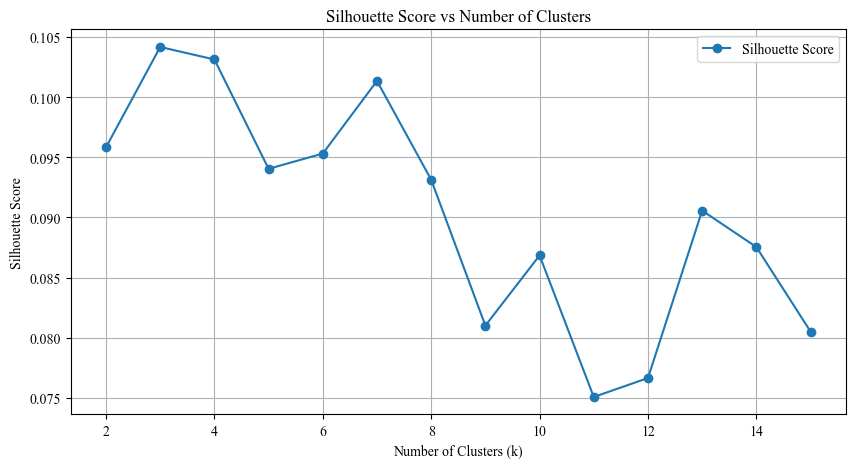

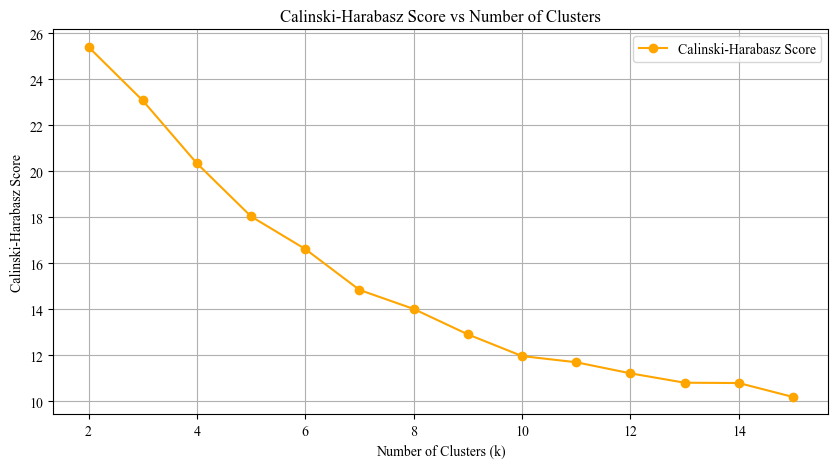

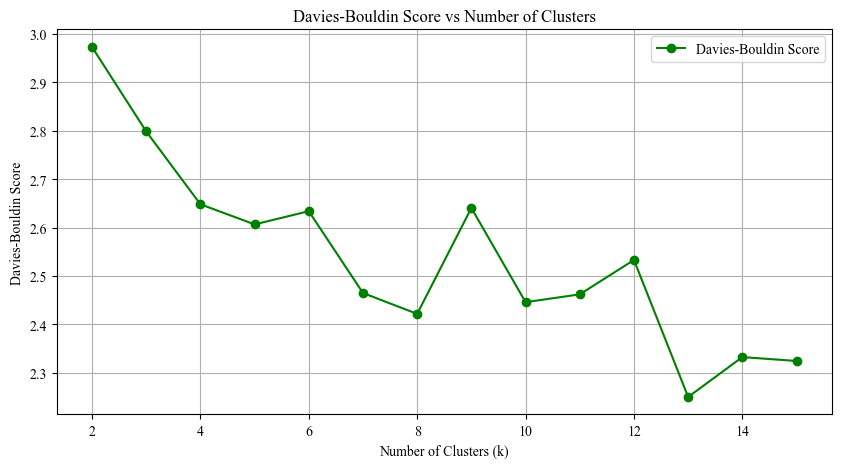

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 设置全局字体
plt.rcParams["font.family"] = "Times New Roman"

# 初始化不同 k 值的列表
k_values = list(range(2, 16))

# 初始化评估指标的列表
silhouette_scores = []
ch_scores = []
db_scores = []

# 遍历不同的 k 值
for k in k_values:
    # 创建 KMeans 对象并进行聚类
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    
    # 计算轮廓系数
    silhouette = silhouette_score(embeddings, clusters)
    silhouette_scores.append(silhouette)
    
    # 计算Calinski-Harabasz指数
    ch = calinski_harabasz_score(embeddings, clusters)
    ch_scores.append(ch)
    
    # 计算Davies-Bouldin指数
    db = davies_bouldin_score(embeddings, clusters)
    db_scores.append(db)


# 绘制轮廓系数得分图
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.savefig('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧silhouette_score.jpeg', dpi=300, format='jpeg')
plt.show()

# 绘制Calinski-Harabasz指数得分图
plt.figure(figsize=(10, 5))
plt.plot(k_values, ch_scores, marker='o', label='Calinski-Harabasz Score', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.savefig('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧calinski_harabasz_score.jpeg', dpi=300, format='jpeg')
plt.show()

# 绘制Davies-Bouldin指数得分图
plt.figure(figsize=(10, 5))
plt.plot(k_values, db_scores, marker='o', label='Davies-Bouldin Score', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.savefig('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/微短剧davies_bouldin_score.jpeg', dpi=300, format='jpeg')
plt.show()


###2.3.2层次聚类和DBSCAN--不适用

In [45]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd



# 使用层次聚类进行聚类
def hierarchical_clustering(embeddings, n_clusters=None):
    if n_clusters is None:
        # 使用Silhouette Score选择最优聚类数量
        best_score = -1
        best_n_clusters = 2
        for n in range(2, len(embeddings)//2):
            clustering = AgglomerativeClustering(n_clusters=n)
            labels = clustering.fit_predict(embeddings)
            score = silhouette_score(embeddings, labels)
            if score > best_score:
                best_score = score
                best_n_clusters = n
        n_clusters = best_n_clusters
    
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(embeddings)
    return labels

# 计算聚类的Silhouette Score
def compute_silhouette_score(embeddings, labels):
    score = silhouette_score(embeddings, labels)
    return score

# 示例用法

hierarchical_labels = hierarchical_clustering(embeddings)

hierarchical_score = compute_silhouette_score(embeddings, hierarchical_labels)

df = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/只含有新质量特征的列表.xlsx')


# 创建一个 DataFrame 来保存结果
result_df = pd.DataFrame({'Sentence': df['content'],
                          'Hierarchical Labels': hierarchical_labels})

# 将结果保存到 Excel 文件中
result_df.to_excel('clustering_results_with_sentences.xlsx', index=False)



#2.3基于提示工程进行质量特征去重-不可行

In [ ]:
import datetime
import pandas as pd


data = pd.read_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/只含有新质量特征的列表.xlsx')


data[['quality_features_initial']]= data[['content']].values.astype(str)

data[['quality_features_initial']]   

In [ ]:
import pandas as pd

# 输入数据，假设数据框名为data，包含评论列'review'
inputs = data['quality_features_initial'][:10]  # 选择所有评论的质量特征

# 提示面板
instruction_panel = """
您将收到一组质量特征列表。您的任务是合并释义或接近重复的质量特征。如果不需要修改,则返回“None”。

[示例] 
示例 1:将质量特征“[1]角色塑造”和“[1]人物塑造”合并为“[1]人物”
主题列表：
[1]人物塑造:动画中角色的外观、性格、动作的创造和设计以及人物关系的设定 
[1]角色塑造:角色的外观、性格、动作的创造和设计以及人物关系的设定 
[1]人物：角色的外观、性格、动作的创造和设计以及人物关系的设定 
[1]情节发展:动画剧中故事情节的推进和发展,包括情节转折、紧凑度和吸引力

您的回答：
[1]人物：角色的外观、性格、动作的创造和设计以及人物关系的设定（[1]角色塑造，[1]人物塑造）

示例 2:将质量特征“[1]忠实度”和“[1]改编质量”和“[1]原作还原度”合并为“[1]整体适应性” 
主题列表：
[1]忠实度:动画剧对原著小说内容的忠实程度 
[1]改编质量:动画对原著内容的忠实度和敏感性,以及将其有效适配到动画媒介的能力
[1]视觉效果:动画中的特效、场景细节和画面表现力
[1]整体适应性:动画改编作品对原作内容的忠实度和敏感性,以及将其有效适配到动画媒介的能力
您的回答：
[1]人物：角色的外观、性格、动作的创造和设计以及人物关系的设定（[1]忠实度，[1]改编质量）



[规则] 
- 根据需要多次执行以下操作：
 - 将相关质量特征合并为单个质量特征。 
 - 如果不需要修改，则不执行任何操作并返回“None”。 
 - 合并时，输出格式应包含更新的标签和描述，后跟原始质量特征。

"""

# 创建空集合存储质量特征
unique_quality_features = set()

# 循环遍历每个评论的质量特征列表
for quality_features_list in inputs:
    # 对每个质量特征调用大语言模型
    for feature in quality_features_list:
        # 调用大语言模型
        output = llm.invoke(instruction_panel + feature).content
        # 将结果添加到集合中
        unique_quality_features.add(output)

# 输出结果
list(unique_quality_features)


In [ ]:
import pandas as pd
import time

# 输入数据，假设数据框名为data，包含评论列'review'
inputs = data['quality_features_initial'][:10]  # 选择所有评论的质量特征

# 提示面板
instruction_panel = """
您将收到一组质量特征列表。您的任务是合并释义或接近重复的质量特征。如果不需要修改,则返回“None”。

[示例] 
示例 1:将质量特征“[1]角色塑造”和“[1]人物塑造”合并为“[1]人物”
主题列表：
[1]人物塑造:动画中角色的外观、性格、动作的创造和设计以及人物关系的设定 
[1]角色塑造:角色的外观、性格、动作的创造和设计以及人物关系的设定 
[1]人物：角色的外观、性格、动作的创造和设计以及人物关系的设定 
[1]情节发展:动画剧中故事情节的推进和发展,包括情节转折、紧凑度和吸引力

您的回答：
[1]人物：角色的外观、性格、动作的创造和设计以及人物关系的设定（[1]角色塑造，[1]人物塑造）

示例 2:将质量特征“[1]忠实度”和“[1]改编质量”和“[1]原作还原度”合并为“[1]整体适应性” 
主题列表：
[1]忠实度:动画剧对原著小说内容的忠实程度 
[1]改编质量:动画对原著内容的忠实度和敏感性,以及将其有效适配到动画媒介的能力
[1]视觉效果:动画中的特效、场景细节和画面表现力
[1]整体适应性:动画改编作品对原作内容的忠实度和敏感性,以及将其有效适配到动画媒介的能力
您的回答：
[1]人物：角色的外观、性格、动作的创造和设计以及人物关系的设定（[1]忠实度，[1]改编质量）



[规则] 
- 根据需要多次执行以下操作：
 - 将相关质量特征合并为单个质量特征。 
 - 如果不需要修改，则不执行任何操作并返回“None”。 
 - 合并时，输出格式应包含更新的标签和描述，后跟原始质量特征。

"""

# 创建空集合存储质量特征
unique_quality_features = set()

# 设置运行时间间隔（单位：秒）
time_interval = 180  # 3分钟

# 获取程序开始时间
start_time = time.time()

# 当前时间
current_time = time.time()

# 循环遍历每个评论的质量特征列表，直到超过设定的时间间隔
while current_time - start_time < time_interval:
    for quality_features_list in inputs:
        # 对每个质量特征调用大语言模型
        for feature in quality_features_list:
            # 调用大语言模型
            output = llm.invoke(instruction_panel + feature).content
            # 将结果添加到集合中
            unique_quality_features.add(output)
    
    # 获取当前时间
    current_time = time.time()

# 将结果转换为列表
unique_quality_features_list = list(unique_quality_features)

# 创建数据框
df = pd.DataFrame(unique_quality_features_list, columns=['质量特征'])

# 保存结果到 Excel 文件
df.to_excel('D:/研究生论文/小论文2/代码/02质量特征识别/01质量特征的确定/质量特征列表.xlsx', index=False)
